In [3]:
# tail recursion - no stack overflow

def fact(num, accum=1):
    if num == 1:
        return accum
    return fact(num-1, accum * num)  # tail recursion: no statement after recursive call: function deleted from call stack

fact(8)

40320

In [2]:
import math

a = math.sqrt(2)
a**((a**a)**a)

2.0000000000000004

In [46]:
import PyPDF2
import os
import re

MY_PATH = r'C:\Users\bscho\Desktop\Orladeyo Mailing Jun23'
os.chdir(MY_PATH)

pdffileobject = open('EAACI 2022 - APeX-2 150 mg poster_final_6.15.22(1).pdf', 'rb')
pdfreader = PyPDF2.PdfFileReader(pdffileobject)
pageobj = pdfreader.getPage(0)
fulltext = pageobj.extractText()

refpattern = r'Reference'
#print(re.match(refpattern, fulltext, re.IGNORECASE))
refbegin = fulltext.find(refpattern)
reftext = fulltext[refbegin:refbegin+1000]  # todo: how to find the end?

refpattern = r' \d\.'
print(re.findall(refpattern, reftext))
print(re.split(refpattern, reftext))

# https://stackoverflow.com/questions/63632861/python-regex-to-get-citations-in-a-paper
author = r"(?:[A-Z][A-Za-z'`-]+)"
etal = r"(?:et al\.?)"
additional = f"(?:,? (?:(?:and |& )?{author}|{etal}))"
year_num = "(?:19|20)[0-9][0-9]"
page_num = "(?:, p\.? [0-9]+)?"  # Always optional
year = fr"(?:, *{year_num}{page_num}| *\({year_num}{page_num}\))"
regex = fr'\b(?!(?:Although|Also)\b){author}{additional}*{year}'
matches = re.findall(regex, reftext)

#print(matches)
# https://stackoverflow.com/questions/56317078/regex-for-capturing-scientific-citations
print(re.findall(r'\([^()\d]*\d[^()]*\)', reftext))

# https://stackoverflow.com/questions/49571999/regex-for-getting-the-title-and-the-author-from-reference-list
#print(re.findall(r'\(\'(\d+)\'\,\s\'(.*?\“|.*?\:)(.*?\”|.*?\.)(.*?\')\)', reftext))

[' 1.', ' 2.', ' 3.', ' 4.', ' 5.', ' 6.']
['References:', 'Farkas H. Expert Opin Ther Targets . 2019;23:457-459. ', 'Ghazi A, Grant JA. Biologics. 2013;7:103-113. ', 'Maurer M, et al. World Allergy Organ J . 2022;15:100627. ', 'Kiani S, et al. Oral presentation; Presented virtually at EAACI Annual Meeting; 2021.', ' . Gower R, et al. Poster presentation. Presented at The American Academy of Allergy, Asthma & Immunology; 2022.', ' Weller K, et al. Allergy. 2013;68:1185–1192. Teresa Caballero,1 Delphine Gobert,2 Bhavisha Desai,3Dianne Tomita,3Phil Collis,3Bob Geng4 on behalf of the APeX-2 Investigators \n1Allergy Department, La Paz University Hospital, IdiPAZ, CIBERER U754, Madrid, Spain;2Sorbonne université, Saint Antoine UniversityHospital, Paris, France 3BioCryst Pharmaceuticals, Inc, Durham, NC, United States;4 University of California, San Diego, La Jolla CA, United States\n≥Week 96Randomized 1:1:1\nProspective run-in period to establish baseline HAE attack rate(Day 14-70)\nBerotra

In [45]:
# https://github.com/PacktPublishing/Transformers-for-Natural-Language-Processing
# https://github.com/nlp-with-transformers/notebooks

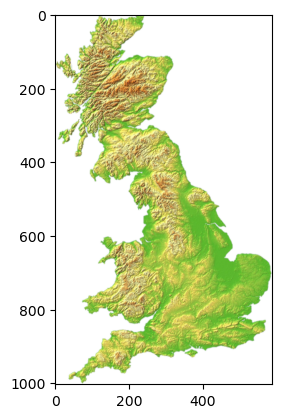

In [116]:
# load the base map from file
import matplotlib.pyplot as plt
import os

MY_PATH = r'C:\Users\bscho\Desktop'
os.chdir(MY_PATH)

img = plt.imread('GBmapsimple1.bmp')
imgplot = plt.imshow(img)
plt.show()

In [15]:
img[773][200:230]  # get a feel for the data

array([[177, 173,  88],
       [168, 164,  74],
       [195, 191, 106],
       [170, 165,  86],
       [165, 159,  77],
       [168, 161,  79],
       [140, 132,  51],
       [160, 151,  68],
       [155, 146,  62],
       [188, 178,  92],
       [225, 217, 130],
       [179, 170,  78],
       [181, 169,  74],
       [164, 152,  48],
       [201, 189,  82],
       [214, 203,  97],
       [174, 162,  64],
       [226, 216, 127],
       [248, 239, 158],
       [171, 160,  77],
       [181, 169,  81],
       [231, 212, 116],
       [212, 194,  88],
       [244, 235, 120],
       [252, 247, 133],
       [252, 247, 148],
       [251, 246, 166],
       [219, 213, 145],
       [188, 180, 117],
       [224, 207, 133]], dtype=uint8)

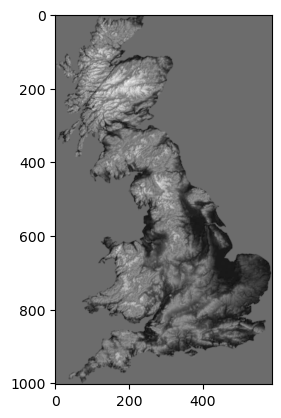

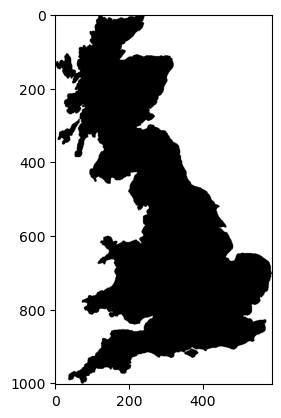

In [70]:
# transform to simple height from RGB
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return np.dot(rgb[...,:3], [0.5, -0.6, 0.0])  # brown is higher up, green is lower

def rgb2mask(rgb):
    '''create a mask for the land to prevent movement into the sea'''
    filter_arr = []
    # go through each element in arr
    for row in rgb:
        filter_row = []
        for element in row:
            if element[0] == 255 and element[1] == 255 and element[2] == 255:
                filter_row.append(1)
            else:
                filter_row.append(0)
        filter_arr.append(filter_row)
    return filter_arr

#img = mpimg.imread('image.png')     
gray = rgb2gray(img)
gray *= (1.0/(gray.max() - gray.min()))
gray -= gray.min()
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

mask = rgb2mask(img)
plt.imshow(mask, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [69]:
print(np.max(gray), np.min(gray))  # look at the data again
print('x, y:', len(gray[0]), len(gray))

0.9999999999999999 0.0
x, y: 587 1003


In [78]:
mask[800][400], mask[950][400]  # and again...

(0, 1)

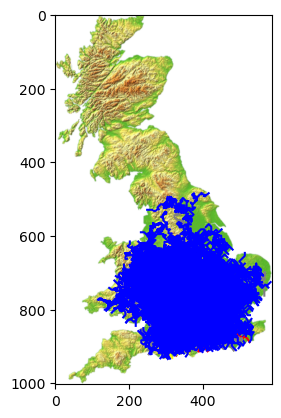

In [184]:
import random

def onestep(x, y, map, mask, factor=10):
    '''take one step on the map, considering the terrain'''
    nx, ny = x, y
    #if nx<0 or ny<0 or nx>len(map)-1 or ny>len(map[0])-1:
        #return -1, -1
    if mask[nx][ny] == 1:
        return -1, -1
    ctr = 0
    while mask[nx][ny] == 0 and ctr < 10:
        step = random.choice([(0,1), (1,1), (1,0), (1,-1), (0,-1), (-1,-1), (-1,0), (-1,1)])
        nx = max(min(len(map)-1, x + int(step[0] * factor * (1-map[nx][ny]))), 0)  # very simple terrain factor: the higher, the harder
        ny = max(min(len(map[0])-1, y + int(step[1] * factor * (1-map[nx][ny]))), 0)
        ctr += 1
    return nx, ny

# onestep(800, 400, gray, mask)

def walkpath(xstart, ystart, map, mask, nsteps=100):
    '''walk an entire path on the terrain'''
    path = []
    x, y = xstart, ystart
    n = 0
    while n < nsteps and x > 0 and y > 0:
        x, y = onestep(x, y, gray, mask)
        if x>0 and y>0:
            path.append((x, y))
        n += 1
    return path

#cpath = walkpath(800, 400, gray, mask)
#plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

plt.imshow(img)

endpoints = []
# start with a few seed paths
for i in range(10):
    cpath = walkpath(900, 400, gray, mask)
    if len(cpath) > 0:
        endpoints.append(cpath[-1])
    plt.plot([x[1] for x in cpath], [x[0] for x in cpath], 'red')

# for each seed path, create generations of branches
colors = ['blue', 'red', 'yellow', 'grey']
for gencounts in range(5):
    ep2 = []
    for p in endpoints:
        for i in range(5):
            cpath = walkpath(p[0], p[1], gray, mask)
            if len(cpath) > 0:
                ep2.append(cpath[-1])
            plt.plot([x[1] for x in cpath], [x[0] for x in cpath], colors[gencounts % len(colors)])
    endpoints = [p for p in ep2]
    
plt.show()

In [3]:
# Accumulator factory

def accumulatorfactory(n):
    return lambda i: n + i

accumulatorfactory(5)(2)


7

In [8]:
# factors
import math

def factors(n):
    res = [1, n]
    for i in range(2, int(math.sqrt(n))+1):
        if n%i == 0:
            res.append(i)
            res.append(n // i)
    return res

factors(45)

[1, 45, 3, 15, 5, 9]

In [50]:

import PyPDF2
import os
import re

MY_PATH = r'C:\Users\bscho\Desktop\Orladeyo Mailing Jun23'
os.chdir(MY_PATH)

pdffileobject = open('btt-7-103.pdf', 'rb')
pdfreader = PyPDF2.PdfFileReader(pdffileobject)
number_of_pages = pdfreader.getNumPages()

#pageobj = pdfreader.getPage(0)
#fulltext = pageobj.extractText()

fulltext = ''
for page_number in range(number_of_pages):
    page = pdfreader.getPage(page_number)
    page_content = page.extractText()
    fulltext += page_content

#refpattern = r'Reference'
#print(re.match(refpattern, fulltext, re.IGNORECASE))
#refbegin = fulltext.find(refpattern)
#reftext = fulltext[refbegin:refbegin+1000]  # todo: how to find the end?

#refpattern = r' \d\.'
#print(re.findall(refpattern, reftext))
#print(re.split(refpattern, reftext))

matchtext = 'Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx'

abstracttext = "Hereditary angioedema (HAE) is an autosomal dominant, potentially life-threatening condition, manifesting as recurrent and self-limiting episodes of facial, laryngeal, genital, or peripheral swelling with abdominal pain secondary to intra-abdominal edema. The estimated prevalence of HAE in the general population is one individual per 50,000, with reported ranges from 1:10,000 to 1:150,000, without major sex or ethnic differences. Various treatment options for acute attacks and prophylaxis of HAE are authorized and available in the market, including plasma-derived (Berinert®, Cinryze®, and Cetor®) and recombinant (Rhucin® and Ruconest™) C1 inhibitors, kallikrein inhibitor-ecallantide (Kalbitor®), and bradykinin B2 receptor antagonist-icatibant (Firazyr®). Some of these drugs are used only to treat HAE attacks, whereas others are only approved for prophylactic therapies and all of them have improved disease outcomes due to their different mechanisms of action. Bradykinin and its binding to B2 receptor have been demonstrated to be responsible for most of the symptoms of HAE. Thus icatibant (Firazyr®), a bradykinin B2 receptor antagonist, has proven to be an effective and more targeted treatment option and has been approved for the treatment of acute attacks of HAE. Rapid and stable relief from symptoms of cutaneous, abdominal, or laryngeal HAE attacks has been demonstrated by 30 mg of icatibant in Phase III clinical trials. Self-resolving mild to moderate local site reactions after subcutaneous injection of icatibant were observed. Icatibant is a new, safe, and effective treatment for acute attacks of HAE. HAE has been reported to result in enormous humanistic burden to patients, affecting both physical and mental health, with a negative impact on education, career, and work productivity, and with substantial economic burdens. The timely and proper use of disease-specific treatments could improve patients' quality of life, reduce the disease-specific morbidity and mortality, and, last but not least, reduce costs associated with hospitalizations and emergency room visits. Therefore, the paradigm of HAE treatment has the potential to evolve significantly, thereby exponentially improving a patient's quality of life."


print(fulltext[5000:10000])




Xref table not zero-indexed. ID numbers for objects will be corrected.


iagnosis  
of HAE
History
J L Milton was the first to describe HAE, in 1876,4 and 
Quincke was the first to assign the name “angioneurotic 
edema” to the disease, in 1882.5 Mental stress was observed 
to have an effect on exacerbations of the disease, thus the word 
“neurotic” was used as part of its name. Sir William Osler, in 
1888, was the first to provide a detailed description of HAE 
over five generations, thus noting the hereditary component of 
this disease.6 The biochemical basis for hereditary angioneu -
rotic edema – the absence of C1-INH – was discovered several 
decades later and first published by Donaldson and Evans in 
1963.7 Since that study, a plethora of information regarding 
the genetic basis, pathophysiology, clinical manifestation, and 
management of HAE has been discovered and published.
Epidemiology
The estimated prevalence of HAE is 1 in 50,000, with 
reported ranges from 1:10,000 to 1:150,000.1,8,9,19 HAE has 
been reported in all races and sexes. Type 1 is e

In [21]:
fulltext = fulltext.replace("\n", "")
fulltext_data = [sentence.split(" ") for sentence in fulltext.split('.')]
print(fulltext_data[:10])

[['©', '2013', 'Ghazi', 'and', 'Grant,', 'publisher', 'and', 'licensee', 'Dove', 'Medical', 'Press', 'Ltd'], ['', 'This', 'is', 'an', 'Open', 'Access', 'article', '', 'which', 'permits', 'unrestricted', 'noncommercial', 'use,', 'provided', 'the', 'original', 'work', 'is', 'properly', 'cited'], ['Biologics:', 'Targets', 'and', 'Therapy', '2013:7', '103–113Biologics:', 'Targets', 'and', 'TherapyHereditary', 'angioedema:', 'epidemiology,', '', 'management,', 'and', 'role', 'of', 'icatibantAasia', 'GhaziJ', 'Andrew', 'GrantUniversity', 'of', 'Texas', 'Medical', 'Branch,', 'Division', 'of', 'Allergy', 'and', 'Clinical', 'Immunology,', 'Galveston,', 'TX,', 'USACorrespondence:', 'Aasia', 'Ghazi', '', 'University', 'of', 'Texas', 'Medical', 'Branch,', 'Division', 'of', 'Allergy', 'and', 'Clinical', 'Immunology,', '5'], ['112', 'John', 'Sealy', 'Annex,', '', '301', 'University', 'Blvd,', 'Galveston,', '', 'TX', '77555-0561,', 'USA', '', 'Fax', '+1', '409', '772', '9532', '', 'Email', 'aighazi@u

In [2]:
# https://radimrehurek.com/gensim/models/doc2vec.html
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html

#from gensim.test.utils import common_texts
#from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
#model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

#vector = model.infer_vector(["system", "response"])



import gensim
import gensim.downloader as api

dataset = api.load("text8")
data = [d for d in dataset]


def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])


data_for_training = list(tagged_document(data))

model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

print(model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization']))




[-0.07382889 -0.10497645 -0.28748462  0.09153821  0.02906915 -0.1983337
 -0.08478821  0.05747487 -0.15897487 -0.01400731  0.2294637  -0.06198872
 -0.26587364 -0.10655783 -0.21334662 -0.03214156 -0.0551004   0.11489787
 -0.350107   -0.12751701  0.12931593  0.12799586 -0.0140921   0.03661414
 -0.02935428 -0.12121519 -0.1826431  -0.20766081 -0.03520737 -0.15218696
 -0.03321822  0.05526032 -0.3057363  -0.41226405 -0.24270225  0.05079066
 -0.14740245 -0.42780653 -0.06188729 -0.10430484]


In [5]:
print(data[:2])

[['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 's

In [7]:
print(list(dataset)[:2])

[['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 's

In [10]:
import random

doc_id = random.randint(0, len(data_for_training) - 1)

print('Document ({}): «{}»\n'.format(doc_id, ' '.join(data_for_training[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)

for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(data_for_training[sims[index][0]].words)))

Document (739): «subdivisions they are to be considered counties rather than states estonian pl maakonnad sg maakond international organization participation estonia is member of the bis cbss ce eapc ebrd ece eu fao iaea ibrd icao icc icftu icrm ifc ifrcs iho ilo imf imo interpol ioc iom observer iso correspondent itu opcw osce un unctad unesco unmibh unmik untso upu wco weu associate partner who wipo wmo wto source estonica estonia in brief political system politics of estonia estonia as a new member of the wto is steadily moving toward a modern market economy with increasing ties to the west including the pegging of its currency to the euro it acceded to the european union in two zero zero four there is a great degree of economic mobility and technological advancement the state of the economy is greatly influenced by developments in finland sweden and germany three major trading partners the high current account deficit remains a concern although the economy has high gdp growth aroun

NameError: name 'sims' is not defined

## test ref check

In [45]:
import PyPDF2
import os
import re

MY_PATH = r'C:\Users\bscho\Desktop\Orladeyo Mailing Jun23'
os.chdir(MY_PATH)

pdffileobject = open('btt-7-103.pdf', 'rb')
pdfreader = PyPDF2.PdfFileReader(pdffileobject)
number_of_pages = pdfreader.getNumPages()

fulltext = ''
for page_number in range(number_of_pages):
    page = pdfreader.getPage(page_number)
    page_content = page.extractText()
    fulltext += page_content

matchtext = 'Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx'

abstracttext = "Hereditary angioedema (HAE) is an autosomal dominant, potentially life-threatening condition, manifesting as recurrent and self-limiting episodes of facial, laryngeal, genital, or peripheral swelling with abdominal pain secondary to intra-abdominal edema. The estimated prevalence of HAE in the general population is one individual per 50,000, with reported ranges from 1:10,000 to 1:150,000, without major sex or ethnic differences. Various treatment options for acute attacks and prophylaxis of HAE are authorized and available in the market, including plasma-derived (Berinert®, Cinryze®, and Cetor®) and recombinant (Rhucin® and Ruconest™) C1 inhibitors, kallikrein inhibitor-ecallantide (Kalbitor®), and bradykinin B2 receptor antagonist-icatibant (Firazyr®). Some of these drugs are used only to treat HAE attacks, whereas others are only approved for prophylactic therapies and all of them have improved disease outcomes due to their different mechanisms of action. Bradykinin and its binding to B2 receptor have been demonstrated to be responsible for most of the symptoms of HAE. Thus icatibant (Firazyr®), a bradykinin B2 receptor antagonist, has proven to be an effective and more targeted treatment option and has been approved for the treatment of acute attacks of HAE. Rapid and stable relief from symptoms of cutaneous, abdominal, or laryngeal HAE attacks has been demonstrated by 30 mg of icatibant in Phase III clinical trials. Self-resolving mild to moderate local site reactions after subcutaneous injection of icatibant were observed. Icatibant is a new, safe, and effective treatment for acute attacks of HAE. HAE has been reported to result in enormous humanistic burden to patients, affecting both physical and mental health, with a negative impact on education, career, and work productivity, and with substantial economic burdens. The timely and proper use of disease-specific treatments could improve patients' quality of life, reduce the disease-specific morbidity and mortality, and, last but not least, reduce costs associated with hospitalizations and emergency room visits. Therefore, the paradigm of HAE treatment has the potential to evolve significantly, thereby exponentially improving a patient's quality of life."


In [46]:

import gensim
import gensim.downloader as api


fulltext = fulltext.replace("\n", "")
fulltext_data = [sentence.split(" ") for sentence in fulltext.split('.')]  # split sentences
# from here: split into equal length portions
#fulltext = fulltext.replace(".", "")
#splitlength = len(matchtext.split(" "))
#fulltext_list = fulltext.split(" ")
#fulltext_data = [fulltext_list[i:i+splitlength] for i in range(0, len(fulltext_list)-splitlength, splitlength)]

print(fulltext_data[:1])


def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])


data_for_training = list(tagged_document(fulltext_data))

model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

print(model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization']))


[['©', '2013', 'Ghazi', 'and', 'Grant,', 'publisher', 'and', 'licensee', 'Dove', 'Medical', 'Press', 'Ltd']]
[-0.01224934  0.00315905 -0.02666106 -0.00022769  0.02247116 -0.00363812
 -0.00317182  0.02301836 -0.02794889  0.02238929  0.02421699 -0.00748218
  0.01295903  0.00375607  0.03139805  0.01128816 -0.00956353 -0.01757236
 -0.00675913 -0.03133835  0.01297737  0.00018919  0.02209173  0.00225362
 -0.02441467 -0.01527954  0.00250197  0.04254151 -0.0198176   0.01285429
  0.03336002 -0.00429513  0.01995834 -0.01338516 -0.00064971  0.01334566
  0.04920501 -0.0293769  -0.01227448 -0.01963781]


In [47]:
ranks = []
second_ranks = []
for doc_id in range(len(data_for_training)):
    inferred_vector = model.infer_vector(data_for_training[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

In [48]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 53, 1: 33, 2: 24, 4: 21, 3: 18, 6: 17, 5: 17, 9: 12, 10: 12, 17: 11, 8: 11, 14: 11, 7: 9, 15: 7, 31: 7, 20: 6, 16: 6, 21: 6, 13: 6, 11: 5, 22: 5, 12: 5, 19: 5, 25: 5, 23: 5, 32: 5, 38: 5, 27: 4, 30: 4, 35: 4, 18: 4, 26: 4, 34: 4, 28: 4, 44: 4, 33: 4, 24: 4, 612: 4, 43: 4, 36: 4, 452: 3, 679: 3, 68: 3, 400: 3, 46: 3, 57: 3, 659: 3, 583: 3, 650: 3, 674: 3, 252: 2, 45: 2, 361: 2, 428: 2, 424: 2, 533: 2, 41: 2, 683: 2, 47: 2, 37: 2, 132: 2, 365: 2, 409: 2, 288: 2, 209: 2, 484: 2, 142: 2, 331: 2, 180: 2, 172: 2, 60: 2, 246: 2, 70: 2, 85: 2, 75: 2, 29: 2, 50: 2, 603: 2, 686: 2, 579: 2, 325: 2, 386: 2, 631: 2, 605: 2, 426: 2, 411: 2, 635: 2, 194: 2, 595: 2, 589: 2, 413: 2, 570: 2, 656: 2, 139: 2, 40: 2, 42: 2, 330: 2, 624: 2, 61: 2, 215: 2, 638: 2, 203: 1, 76: 1, 192: 1, 103: 1, 625: 1, 49: 1, 82: 1, 62: 1, 149: 1, 439: 1, 39: 1, 456: 1, 86: 1, 320: 1, 164: 1, 304: 1, 242: 1, 478: 1, 500: 1, 112: 1, 504: 1, 245: 1, 396: 1, 453: 1, 224: 1, 263: 1, 352: 1, 183: 1, 196: 1, 182: 1, 35

In [49]:
import random

doc_id = random.randint(0, len(data_for_training) - 1)

print('Document ({}): «{}»\n'.format(doc_id, ' '.join(data_for_training[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)

for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(data_for_training[sims[index][0]].words)))

Document (269): «3 days and students a mean of 1»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec<dm/m,d40,n5,w5,mc2,s0.001,t3>:

MOST (690, 0.7552984952926636): «co mDove press Dove pressDove pres s113Hereditary angioedema: epidemiology, management, and role of icatibant»

SECOND-MOST (315, 0.7008804678916931): «co mDove press Dove press111Hereditary angioedema: epidemiology, management, and role of icatibantBiologics: Targets and Therapy 2013:7using icatibant in patients with other types of angioedema are much needed»

MEDIAN (469, 0.47992128133773804): « 31»

LEAST (556, -0.5057835578918457): «  ScientificWorldJournal »



In [50]:

matchtext = 'Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx'

#vector = model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
vector = model.infer_vector(matchtext.split(' '))

print(vector)

[-0.06566817  0.10560708 -0.1641392   0.0684114   0.21179792  0.08414139
  0.02682711  0.13292804 -0.25482723  0.16179702  0.07220736  0.02330664
  0.1527348  -0.0346156   0.30606705  0.18633145 -0.05222659 -0.06431907
 -0.20618151 -0.18737091  0.04355499 -0.12488979  0.2306929   0.08906934
 -0.23464215 -0.02719773  0.11818383  0.35521978 -0.32092184  0.02243722
  0.24178201 -0.03919474  0.21138318 -0.08059515  0.06108177  0.03477379
  0.4876476  -0.18590368 -0.24728444 -0.15425266]


In [51]:

print(matchtext)
print()

# Pick a random document from the test corpus and infer a vector from the model
#doc_id = random.randint(0, len(data_for_training) - 1)
#inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.dv.most_similar([vector], topn=len(model.dv))

# Compare and print the most/median/least similar documents from the train corpus
#print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(data_for_training[doc_id])))
#print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
#for label, index in [('MOST', 0), ('2ndMOST', 1), ('3rdMOST', 2), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
#    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(data_for_training[sims[index][0]].words)))

for index in range(len(sims)//20):
    print(f"{sims[index]} : {' '.join(data_for_training[sims[index][0]].words)}")

Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx

(430, 0.9913914203643799) :  Evidence-based recommendations for the therapeutic management of angioedema owing to the hereditary C1 inhibitor deficiency: consensus report of an International Working Group
(6, 0.990590512752533) :  Vari -ous treatment options for acute attacks and prophylaxis of HAE are authorized and available in the market, including plasma-derived (Berinert®, Cinryze®, and Cetor®) and recombi nant (Rhucin® and Ruconest™) C1 inhibitors, kallikrein inhibitor-ecallantide (Kalbitor®), and bradykinin B2 receptor antagonist-icatibant (Firazyr®)
(305, 0.9901941418647766) : 23Other than HAE type 1 and 2, there are other types of bradykinin-mediated angioedema, including HAE type 3, acquired angioedema associated with C1-INH d

In [14]:

# which documents best match the current vector? ranks holds the match, with reference to train_corpus 
# here we simply count the word frequencies
for docidx, currentdoc in enumerate(train_corpus):
    ranks.append((docidx, currentdoc.tags, sum([currentdoc.words.count(w) for w in infvec])))
            

NameError: name 'train_corpus' is not defined

In [52]:

from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora


MY_PATH = r'D:\DL\lrgtxt0'
WAIT_1 = 1

corpus_matchtext = preprocess_string(matchtext)

print(corpus_matchtext)


['hereditari', 'angioedema', 'hae', 'inhibitor', 'defici', 'inh', 'hae', 'rare', 'inherit', 'diseas', 'character', 'unpredict', 'potenti', 'life', 'threaten', 'recurr', 'swell', 'attack', 'commonli', 'affect', 'extrem', 'face', 'abdomen', 'larynx']


In [53]:
corpus_fulltext = preprocess_string(fulltext)
fulltext_data = [corpus_fulltext[i*splitlength:(i+1)*splitlength] for i in range(0, len(corpus_fulltext)//(splitlength))]



In [54]:
data_for_training = list(tagged_document(fulltext_data))

model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

print(model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization']))

[-0.00634116 -0.00732283 -0.00934601 -0.00428867  0.00237725 -0.00863081
 -0.00063491  0.00936219 -0.00600026  0.00722371  0.01088892 -0.00449116
 -0.00086033  0.00425785  0.00095157 -0.00876158 -0.00275599 -0.01024196
  0.01198313 -0.01144261  0.0089591   0.00798538  0.00214145  0.00169069
 -0.00126573 -0.01127429 -0.00216438  0.01244055  0.00859177  0.00936317
  0.01042689 -0.00182631  0.00132348 -0.00749632 -0.00904067  0.01042178
 -0.00275498 -0.00879623  0.00852951 -0.00047395]


In [58]:
vector = model.infer_vector(corpus_matchtext)

print(vector)

[-0.00429001 -0.00588246 -0.2116343   0.03224094  0.0277938  -0.00221908
  0.01107555  0.00703811 -0.02949618  0.0745912   0.12629235 -0.06143003
  0.0951165   0.02126594  0.23769055  0.10559855 -0.00322875 -0.08928018
 -0.06423697 -0.04722183 -0.03134139  0.00950965  0.0311419   0.05208955
 -0.04095855 -0.03327048 -0.05318391  0.20689617 -0.17790784  0.01021695
  0.07392038  0.08615414  0.06171961 -0.0832777   0.04661937  0.11532082
  0.18012632 -0.20717384 -0.164163   -0.18916802]


In [60]:
print(matchtext)
print()
print(corpus_matchtext)
print()

sims = model.dv.most_similar([vector], topn=len(model.dv))

for index in range(len(sims)//20):
    print(f"{sims[index]} : {' '.join(data_for_training[sims[index][0]].words)}")

Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx

['hereditari', 'angioedema', 'hae', 'inhibitor', 'defici', 'inh', 'hae', 'rare', 'inherit', 'diseas', 'character', 'unpredict', 'potenti', 'life', 'threaten', 'recurr', 'swell', 'attack', 'commonli', 'affect', 'extrem', 'face', 'abdomen', 'larynx']

(9, 0.9866455793380737) : mucosa subcutan tissu commonli involv area includ face lip tongu pharynx supraglott area uncommonli subglott area angioedema involv hand feet gastrointestin mucou membran genitalia hereditari angioedema hae rare autosom domin
(30, 0.9861238598823547) : cutan edema non pit non urticari ill defin margin commonli involv area face extrem genit facial swell occur approxim patient involv lip tongu oropharynx periorbit ti sue extrem swell common
(72, 0.986046552658081) : i

In [63]:
' '.join(data_for_training[sims[0][0]].words)

'mucosa subcutan tissu commonli involv area includ face lip tongu pharynx supraglott area uncommonli subglott area angioedema involv hand feet gastrointestin mucou membran genitalia hereditari angioedema hae rare autosom domin'

In [64]:
''' Rosetta Code task rosettacode.org/wiki/Sorensenâ€“Dice_coefficient '''
# https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient

from multiset import Multiset


def tokenizetext(txt):
    ''' convert a phrase into a count of bigram tokens of its words '''
    arr = []
    for wrd in txt.lower().split(' '):
        arr += ([wrd] if len(wrd) == 1 else [wrd[i:i+2]
                for i in range(len(wrd)-1)])
    return Multiset(arr)


def sorenson_dice(text1, text2):
    ''' Sorenson-Dice similarity of Multisets '''
    bc1, bc2 = tokenizetext(text1), tokenizetext(text2)
    return 2 * len(bc1 & bc2) / (len(bc1) + len(bc2))


with open('tasklist_sorenson.txt', 'r') as fd:
    alltasks = fd.read().split('\n')

for testtext in ['Primordial primes', 'Sunkist-Giuliani formula',
                 'Sieve of Euripides', 'Chowder numbers']:
    taskvalues = sorted([(sorenson_dice(testtext, t), t)
                        for t in alltasks], reverse=True)
    print(f'\n{testtext}:')
    for (val, task) in taskvalues[:5]:
        print(f'  {val:.6f}  {task}')

ModuleNotFoundError: No module named 'multiset'

In [71]:
"""

Python implementation of

http://rosettacode.org/wiki/Biorhythms

"""

from datetime import date, timedelta
from math import floor, sin, pi

def biorhythms(birthdate,targetdate):
    """
    Print out biorhythm data for targetdate assuming you were
    born on birthdate.
    
    birthdate and targetdata are strings in this format:
    
    YYYY-MM-DD e.g. 1964-12-26
    """
    
    # print dates
    
    print("Born: "+birthdate+" Target: "+targetdate)    
    
    # convert to date types - Python 3.7 or later
    
    birthdate = date.fromisoformat(birthdate)
    targetdate = date.fromisoformat(targetdate)
    
    # days between
    
    days = (targetdate - birthdate).days
    
    print("Day: "+str(days))
    
    # cycle logic - mostly from Julia example
    
    cycle_labels = ["Physical", "Emotional", "Mental"]
    cycle_lengths = [23, 28, 33]
    quadrants = [("up and rising", "peak"), ("up but falling", "transition"),
                   ("down and falling", "valley"), ("down but rising", "transition")]
    
    for i in range(3):
        label = cycle_labels[i]
        length = cycle_lengths[i]
        position = days % length
        quadrant = int(floor((4 * position) / length))
        percentage = int(round(100 * sin(2 * pi * position / length),0))
        transition_date = targetdate + timedelta(days=floor((quadrant + 1)/4 * length) - position)
        trend, next = quadrants[quadrant]
        
        if percentage > 95:
            description = "peak"
        elif percentage < -95:
             description = "valley"
        elif abs(percentage) < 5:
             description = "critical transition"
        else:
             description = str(percentage)+"% ("+trend+", next "+next+" "+str(transition_date)+")"
        print(label+" day "+str(position)+": "+description)
    
    
biorhythms("1975-02-10","2023-12-22")

Born: 1975-02-10 Target: 2023-12-22
Day: 17847
Physical day 22: -27% (down but rising, next transition 2023-12-23)
Emotional day 11: 62% (up but falling, next transition 2023-12-25)
Mental day 27: -91% (down but rising, next transition 2023-12-28)


In [1]:
from math import sqrt

def isGiuga(m):
    n = m
    f = 2
    l = sqrt(n)
    while True:
        if n % f == 0:
            if ((m / f) - 1) % f != 0:
                return False
            n /= f
            if f > n:
                return True
        else:
            f += 1
            if f > l:
                return False


if __name__ == '__main__':
    n = 3
    c = 0
    print("The first 4 Giuga numbers are: ")
    while c < 4:
        if isGiuga(n):
            c += 1
            print(n)
        n += 1

The first 4 Giuga numbers are: 
30
858
1722
66198


In [15]:
# https://stackabuse.com/creating-a-neural-network-from-scratch-in-python/
import numpy as np


def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

feature_set = np.array([[0,1,0], [0,0,1], [1,0,0], [1,1,0], [1,1,1]])
labels = np.array([[1,0,0,1,1]])
labels = labels.reshape(5,1)

np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.09

# forward & backward
for epoch in range(500):
    x = feature_set

    # feedforward
    z = sigmoid(np.dot(x, weights) + bias)

    # backpropagation step 1
    error = z - labels
    if epoch % 50 == 0: print(error.sum())
    # backpropagation step 2
    dpred_dz = sigmoid_der(z)

    z_delta = error * dpred_dz
    x = feature_set.T
    weights -= lr * np.dot(x, z_delta)

    for num in z_delta:
        bias -= lr * num


single_point = np.array([1,0,0])
result = sigmoid(np.dot(single_point, weights) + bias)
print(result)

single_point = np.array([0,1,0])
result = sigmoid(np.dot(single_point, weights) + bias)
print(result)

1.1484765089981492
0.3826105602496096
0.17185738520077565
0.11189389859934662
0.08484081908566549
0.06873187737629899
0.05780303777302742
0.049851715200578295
0.04380145114126244
0.03904595454490739
[0.14480521]
[0.95041035]


In [2]:
# https://pypdf2.readthedocs.io/en/latest/user/adding-pdf-annotations.html

from PyPDF2 import PdfReader, PdfWriter, PdfFileReader
from PyPDF2.generic import AnnotationBuilder
import os

MY_PATH = r'C:\Users\bscho\Desktop\Orladeyo Mailing Jun23'
os.chdir(MY_PATH)

pdffileobject = open('btt-7-103.pdf', 'rb')
pdfreader = PdfFileReader(pdffileobject)
number_of_pages = pdfreader.getNumPages()


# Fill the writer with the pages you want
#pdf_path = os.path.join(RESOURCE_ROOT, "crazyones.pdf")
#reader = PdfReader(pdf_path)
page = pdfreader.pages[0]
writer = PdfWriter()
writer.add_page(page)

# Create the annotation and add it
annotation = AnnotationBuilder.free_text(
    "Hello World\nThis is the second line!",
    rect=(50, 550, 200, 650),
    font="Arial",
    bold=True,
    italic=True,
    font_size="20pt",
    font_color="00ff00",
    border_color="0000ff",
    background_color="cdcdcd",
)
writer.add_annotation(page_number=0, annotation=annotation)

# Write the annotated file to disk
with open("annotated-pdf.pdf", "wb") as fp:
    writer.write(fp)

In [24]:
# ordered pairs

orderedpair = set()
orderedpair.add('a')
orderedpair.add(frozenset(['a', 'b']))
print(orderedpair)

orderedpair.add(frozenset([el for el in orderedpair]))
orderedpair.add(frozenset([frozenset([el for el in orderedpair]), 'c']))
print(orderedpair)

{'a', frozenset({'a', 'b'})}
{'a', frozenset({'a', frozenset({'a', 'b'})}), frozenset({'a', 'b'}), frozenset({'c', frozenset({'a', frozenset({'a', frozenset({'a', 'b'})}), frozenset({'a', 'b'})})})}


In [1]:
# find reference in text
import re

sourcetext = "Evidence-based recommendations for the therapeutic management of angioedema.1,2 Owing to the hereditary C1 inhibitor deficiency: consensus report of an International Working Group.3,4"

refpattern = r'[.](?:(\d+,)+)'
print(re.findall(refpattern, sourcetext))

refpattern = r'[.](?:(\d+,|\d+)+)'
print(re.findall(refpattern, sourcetext))

refpattern = r'[.](?:(\d+,)+|(\d+))'
print(re.findall(refpattern, sourcetext))


['1,', '3,']
['2', '4']
[('1,', ''), ('3,', '')]


In [2]:
5366-2771-1111+1234

2718

In [38]:
import math

def fpi(n, a=2):
    if n == 1 or a < 0:
        return math.pi
    print(a)
    return fpi(n-1, math.log(a) / math.log(math.pi))

print(fpi(3,10000000))

10000000
14.080261073116427
3.141592653589793


In [40]:
def _set_of_substrings(s:str) -> set:
    "_set_of_substrings('ABBA') == {'A', 'AB', 'ABB', 'ABBA', 'B', 'BA', 'BB', 'BBA'}"
    len_s = len(s)
    return {s[m: n] for m in range(len_s) for n in range(m+1, len_s +1)}

def _set_of_common_substrings(s:str, common: set) -> set:
    "Substrings of s that are also in common"
    len_s = len(s)
    return {this for m in range(len_s) for n in range(m+1, len_s +1)
            if (this := s[m:n]) in common}

def lcs_ss(*strings):
    "longest of the common substrings of all substrings of each string"
    strings_iter  = (s for s in strings)
    common = _set_of_substrings(next(strings_iter)) # First string substrings
    for s in strings_iter:
        if not common:
            break
        common = _set_of_common_substrings(s, common) # Accumulate the common

    return max(common, key= lambda x: len(x)) if common else ''


s0 = "thisisatest_stinger"
s1 = "testing123testingthing"
s2 = "thisis"

ans = lcs_ss(s0, s1)
print(f"\n{repr(s0)}, {repr(s1)} ->> {repr(ans)}")
ans = lcs_ss(s0, s2)
print(f"\n{repr(s0)}, {repr(s2)} ->> {repr(ans)}")
ans = lcs_ss(s1, s2)
print(f"\n{repr(s1)}, {repr(s2)} ->> {repr(ans)}")
ans = lcs_ss(s0, s1, s2)
print(f"\n{repr(s0)}, {repr(s1)}, {repr(s2)} ->> {repr(ans)}")



'thisisatest_stinger', 'testing123testingthing' ->> 'sting'

'thisisatest_stinger', 'thisis' ->> 'thisis'

'testing123testingthing', 'thisis' ->> 'thi'

'thisisatest_stinger', 'testing123testingthing', 'thisis' ->> 'thi'


In [10]:


def degree(poly):
    while poly and poly[-1] == 0:
        poly.pop()   # normalize
    return len(poly)-1


def poly_div(N, D):
    dD = degree(D)
    dN = degree(N)
    if dD < 0: raise ZeroDivisionError
    if dN >= dD:
        q = [0] * dN
        while dN >= dD:
            d = [0]*(dN - dD) + D
            mult = q[dN - dD] = N[-1] / float(d[-1])
            d = [coeff*mult for coeff in d]
            N = [coeffN - coeffd for coeffN, coeffd in zip(N, d)]
            dN = degree(N)
        r = N
    else:
        q = [0]
        r = N
    return q, r


if __name__ == '__main__':
    print("POLYNOMIAL LONG DIVISION")
    N = [-42, 0, -12, 1]
    D = [-3, 1, 0, 0]
    print("  %s / %s =" % (N,D),)
    print(" %s remainder %s" % poly_div(N, D))
    N = [1, -2, 0, -4]
    D = [0, 0, 1, -3]
    print("  %s / %s =" % (N,D),)
    print(" %s remainder %s" % poly_div(N, D))


POLYNOMIAL LONG DIVISION
  [-42, 0, -12, 1] / [-3, 1, 0, 0] =
 [-27.0, -9.0, 1.0] remainder [-123.0]
  [1, -2, 0, -4] / [0, 0, 1, -3] =
 [1.3333333333333333, 0, 0] remainder [1.0, -2.0, -1.3333333333333333]


In [9]:
#from genetic import Genetic
#from rocket import Rocket, Vector, Obstacle
import numpy as np
#import pygame


class Vector:
    """ implementation of Eucledian vector"""
    def __init__(self, x=0.0, y=0.0):
        self.x = x
        self.y = y

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __str__(self):
        return "(" + str(self.x) + " " + str(self.y) + ")"

    # equivalent of Vector(0.0, 0.0)
    def nul(self):
        self.x, self.y = 0.0, 0.0

    # calculates the Eucledian distance between 2 vectors
    def dist(self, other):
        x_dist = self.x - other.x
        y_dist = self.y - other.y
        return np.sqrt(x_dist * x_dist + y_dist * y_dist)

    # transforms the vector to a tuple containing integer values
    # the offset is added to the components of the vector
    def tuple_int(self, offset=0.0):
        return int(self.x + offset), int(self.y + offset)

    # creates a vector with random initial values
    @staticmethod
    def random():
        return Vector(np.random.uniform(0, 2.0) - 1.0, np.random.uniform(0, 2.0) - 1.0)


class Obstacle:
    """ the Obstacle is a rectangle whit which the Rocket can collide
        self.a (type Vector) - contains the point for the upper left corner of the rectangle
        self.b (type Vector) - contains the point for the lower right corner of the rectangle
    """
    def __init__(self, x1, y1, x2, y2):
        self.a = Vector(x1, y1)
        self.b = Vector(x2, y2)

    # return true if the rocket's position is inside the obstacle's rectangle
    def do_collide(self, rocket):
        return self.a.x < rocket.location.x and self.a.y < rocket.location.y and \
                self.b.x > rocket.location.x and self.b.y > rocket.location.y

    # transforms the vector to a tuple containing integer values
    # the offset is added to the components of the vector
    def tuple_int(self, offset):
        return self.a.tuple_int(offset), self.b.tuple_int(offset)


class Rocket:
    def __init__(self, length):
        self.location = Vector()
        self.acceleration = Vector()
        self.velocity = Vector()
        self.forces = []
        self.length = length
        # this flag is set to False after the rocket did collide with an obstacle
        self.is_alive = True
        for i in range(0, length):
            self.forces.append(Vector.random())

    # calculates the fitness of a Rocket
    # it is recommended to be called after every force vector was added to the rocket
    def fitness(self, target):
        # the fitness value is basically the distance of the rocket from the target point
        # because we want the have a smaller fitness value for larger distances,
        # the inverse value of the distance is used
        inv_dist_to_target = 1.0 / self.location.dist(target)
        # if a collision was detected with an obstacle, penalize the fitness value
        fitness_rate = 1.0
        if not self.is_alive:
            fitness_rate = 0.0000000000000000001
        return inv_dist_to_target * fitness_rate

    # does the recombination between to elements of the population
    def crossover(self, other):
        # a new child is created
        child = Rocket(self.length)
        # generate a random midpoint
        midpoint = np.random.randint(1, other.length)
        for i in range(0, other.length):
            # do the recombination by taking force vectors from both elements
            if i < midpoint:
                child.forces[i] = self.forces[i]
            else:
                child.forces[i] = other.forces[i]
        return child

    # mutates the current force vector according to the current mutation rate
    def mutate(self, mutation_rate):
        for i in range(0, self.length):
            rand_value = np.random.rand()
            if rand_value < mutation_rate:
                self.forces[i] = Vector.random()

    # applies a force vector to the rocket's acceleration
    def apply_force(self, force):
        self.acceleration += force

    # applies a force vector to the rocket's acceleration
    # the force value is taken from the self.forces array
    def apply_force_at(self, at):
        self.acceleration += self.forces[at]

    # updates the location of the rocket
    def update(self):
        # update the velocity of the rocket
        self.velocity += self.acceleration
        # update the location of the rocket
        self.location += self.velocity
        # the acceleration of the rocket is set to 0.0
        self.acceleration.nul()


BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)
FPS = 60

class Population:
    def __init__(self, loc_x, loc_y, population_size=50, mutation_rate=0.1, obstacles=[]):
        # initialize all variables
        self.target_location = Vector(loc_x, loc_y)
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.population = []
        self.best_child = Rocket(FPS)
        self.obstacles = []
        # initialize the rockets at random values
        for i in range(0, self.population_size):
            self.population.append(Rocket(FPS))
        # create obstacle objects
        for obs in obstacles:
            self.obstacles.append(Obstacle(obs[0], obs[1], obs[2], obs[3]))

    # implementation of the genetic algorithm
    def _next_gen(self):
        # define aux variables for genetic algirthm
        mating_pool = []
        new_generation = []
        for member in self.population:
            # calculate the fitness for every member from the population
            fitness = (member.fitness(self.target_location)) * 1000
            # save the member with the best fitness
            if self.best_child.fitness(self.target_location) * 1000 < fitness:
                self.best_child = member
            # create the mating pool using every member's fitness
            # the recombination will use roulette method which means every member
            # is added to the mating pool multiple times depending on its fitness value
            for i in range(0, int(fitness)):
                mating_pool.append(member)
        for i in range(0, self.population_size):
            # the recombination is done selecting to random members from the mating pool
            first = np.random.randint(0, len(mating_pool) - 1)
            second = np.random.randint(0, len(mating_pool) - 1)
            child = mating_pool[first].crossover(mating_pool[second])
            # the child will suffer a mutation according to the probability of the mutation rate
            child.mutate(self.mutation_rate)
            # the newer generation will represent the population for the next iteration
            new_generation.append(child)
        self.population = new_generation

    # this method computes the routes of the rockets without using visual simulation
    def simulate(self, iterations):
        for i in range(0, iterations):
            # apply all forces for every member
            for member in self.population:
                for force in member.forces:
                    # do not update the rockets position if it did collide with an obstacle
                    if member.is_alive:
                        # apply force to the rocket
                        member.apply_force(force)
                        # update rocket's position
                        member.update()
                        # check member's collision with the obstacles
                        for obs in self.obstacles:
                            if obs.do_collide(member):
                                member.is_alive = False
            # compute the newer generation
            self._next_gen()

    # this method computes the routes of the rockets using visual simulation
    def simulate_with_graphics(self, title="Rockets", width=800, height=600, iteratons=100):
        # calculate an offset point to be able to draw negative positions
        reference_point = Vector(width / 4, height / 4)
        # initialize pygame
        #pygame.init()
        #game_display = pygame.display.set_mode((width, height))
        #pygame.display.set_caption(title)
        # get the clock module for handling FPS
        #clock = pygame.time.Clock()
        # set an exit flag
        game_exit = False
        # set a counter for handling genetic algorithm steps at given moments
        counter = 0
        # iteration counter
        iter_cnt = 0
        # start the main loop
        while not game_exit and iter_cnt < iteratons:
            # handle input events
            #for event in pygame.event.get():
                #if event.type == pygame.QUIT:
                    #game_exit = True
            # clear the playground
            #game_display.fill(BLACK)
            if counter == FPS:
                # reset the counter to 0
                counter = 0
                # increment iter
                iter_cnt += 1
                # compute the newer generation of the population
                self._next_gen()
            for member in self.population:
                # check if rocket did not collide before
                if member.is_alive:
                    # calculate the new position for every rocket
                    member.apply_force_at(counter)
                    # update the rocket's position
                    member.update()
                    # check member's collision with the obstacles
                    for obs in self.obstacles:
                        if obs.do_collide(member):
                            member.is_alive = False
                # display the rockets
                #pygame.draw.circle(game_display, WHITE, member.location.tuple_int(reference_point.x), 1)
            counter += 1
            # display the target position
            #pygame.draw.circle(game_display, RED, self.target_location.tuple_int(reference_point.x), 3)
            # draw the obstacles
            for obs in self.obstacles:
                rect = obs.tuple_int(reference_point.x)
                #pygame.draw.rect(game_display, WHITE, (rect[0],(rect[1][0] - rect[0][0], rect[1][1] - rect[0][1])))
            # display iteration number to the screen
            #font = pygame.font.SysFont("monospace", 15)
            #label = font.render("iteration: " + str(iter_cnt), 1, (255, 255, 0))
            #game_display.blit(label, (width - 150, 10))
            # update the display
            #pygame.display.update()
            # sleep the mainloop for achieving the preset FPS value
            #clock.tick(FPS)
        # print statistics for the best child when the main loop is finished
        self.print_stats()

    # display stats for the best child
    def print_stats(self):
        print("--------------------------------")
        print("Best member from the population:")
        print("Fitness value: ", self.best_child.fitness(self.target_location))
        print("Final location: ", self.best_child.location)
        print("Distance from the target: ", self.best_child.location.dist(self.target_location))
        print("Forces:")
        for f in self.best_child.forces:
            print(f)
        print("--------------------------------")

def main():
    gpopulation = Population(200, 200, 50, 0.1, [(130, 130, 200, 150)])
    gpopulation.simulate_with_graphics()

if __name__ == "__main__":
    main()





--------------------------------
Best member from the population:
Fitness value:  0.5675709514470192
Final location:  (200.55526231302582 198.32788901748165)
Distance from the target:  1.7618942573620184
Forces:
(-0.4786204012099815 0.6720299982183313)
(0.4614691356384861 0.6111069299431462)
(-0.053651963348431364 0.39444074450977973)
(-0.25418269027299 0.4302803512492439)
(0.2999410837796028 0.3366707889106111)
(0.5812782263832419 -0.6858003917631379)
(0.08669061862715366 -0.20247956061256733)
(-0.4274684786583254 0.9732452941982894)
(0.8796314904120184 -0.33680692367814924)
(0.6958116669287402 0.7986815548823494)
(0.6229592283738512 -0.48068461911555627)
(-0.771210827394113 0.8922809861591587)
(0.13208525570034535 -0.12688718568085045)
(-0.3695759669142433 0.9576184202968223)
(0.7423202745125446 -0.7052603228536494)
(-0.7729669041260481 0.6470637481845887)
(0.6741081521253005 -0.19899046628642436)
(0.04689725009144041 0.710895184318419)
(-0.8759036093983652 -0.06890829646835472)
(-0.

In [3]:
import random


def simpleterm(maxn=10):
    a = random.randint(2,maxn)
    b = random.randint(2,maxn)
    term = str(a) + ' * ' + str(b) + ' ' + random.choice(['+', '-']) + ' ' + str(random.randint(1,a-1)) + ' * ' + str(random.randint(1,b-1))
    return term

def compterm(maxn=10):
    return str(random.randint(1,maxn)) + ' * (' + simpleterm(maxn) + ') + ' + str(random.randint(1,maxn)) + ' * (' + simpleterm(maxn) + ')'

for i in range(10):
    t0 = compterm(12)
    print(f'{t0} = {eval(t0)}')

5 * (2 * 3 - 1 * 2) + 9 * (12 * 10 + 9 * 9) = 1829
5 * (6 * 12 + 1 * 7) + 2 * (9 * 3 + 5 * 1) = 459
10 * (2 * 7 + 1 * 6) + 7 * (3 * 11 - 2 * 10) = 291
10 * (7 * 11 + 6 * 3) + 6 * (7 * 5 - 3 * 4) = 1088
2 * (11 * 12 + 7 * 11) + 3 * (6 * 6 + 1 * 1) = 529
1 * (6 * 6 - 5 * 1) + 7 * (5 * 9 + 4 * 6) = 514
10 * (6 * 3 + 1 * 1) + 8 * (4 * 11 - 1 * 1) = 534
5 * (10 * 12 + 6 * 4) + 5 * (5 * 3 - 3 * 2) = 765
2 * (3 * 11 - 1 * 7) + 9 * (12 * 4 + 9 * 2) = 646
4 * (6 * 12 - 2 * 2) + 4 * (11 * 4 + 3 * 1) = 460


In [2]:
import random


def simpleterm(maxn=10):
    a = random.randint(2,maxn)
    b = random.randint(2,maxn)
    term = str(a) + ' * ' + str(b) + ' ' + random.choice(['+', '-']) + ' ' + str(random.randint(1,a-1)) + ' * ' + str(random.randint(1,b-1))
    return term

def compterm(maxn=10):
    return str(random.randint(1,maxn)) + ' * (' + simpleterm(maxn) + ') + ' + str(random.randint(1,maxn)) + ' * (' + simpleterm(maxn) + ')'

for i in range(10):
    t0 = compterm(12)
    print(f'{t0} = {eval(t0)}')
    

5 * (11 * 12 - 9 * 5) + 10 * (7 * 8 - 4 * 7) = 715
4 * (4 * 7 + 2 * 4) + 12 * (8 * 7 - 3 * 2) = 744
5 * (12 * 7 + 10 * 1) + 6 * (11 * 11 + 6 * 7) = 1448
3 * (9 * 5 - 7 * 1) + 10 * (2 * 8 - 1 * 4) = 234
5 * (10 * 2 - 8 * 1) + 1 * (2 * 9 - 1 * 2) = 76
12 * (10 * 3 + 1 * 1) + 9 * (7 * 9 - 3 * 6) = 777
7 * (3 * 4 - 1 * 1) + 9 * (12 * 5 - 9 * 1) = 536
8 * (4 * 11 - 3 * 5) + 8 * (10 * 6 - 3 * 5) = 592
8 * (5 * 6 + 1 * 3) + 7 * (6 * 11 - 1 * 5) = 691
3 * (4 * 6 - 3 * 2) + 8 * (8 * 5 + 3 * 2) = 422


In [3]:
import calendar

def last_fridays(year):
    for month in range(1, 13):
        last_friday = max(week[calendar.FRIDAY]
            for week in calendar.monthcalendar(year, month))
        print('{:4d}-{:02d}-{:02d}'.format(year, month, last_friday))

last_fridays(2023)

2023-01-27
2023-02-24
2023-03-31
2023-04-28
2023-05-26
2023-06-30
2023-07-28
2023-08-25
2023-09-29
2023-10-27
2023-11-24
2023-12-29


In [1]:

def KolmogorovComplexity(s):
    for i in range(1000):
        for each string p of length exactly i:
            if isValidProgram(p) and evaluate(p) == s
                return i



SyntaxError: invalid syntax (1238097971.py, line 3)

In [1]:
def eratosthenes2(n):
    multiples = set()
    for i in range(2, n+1):
        if i not in multiples:
            yield i
            multiples.update(range(i*i, n+1, i))

print(list(eratosthenes2(100)))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


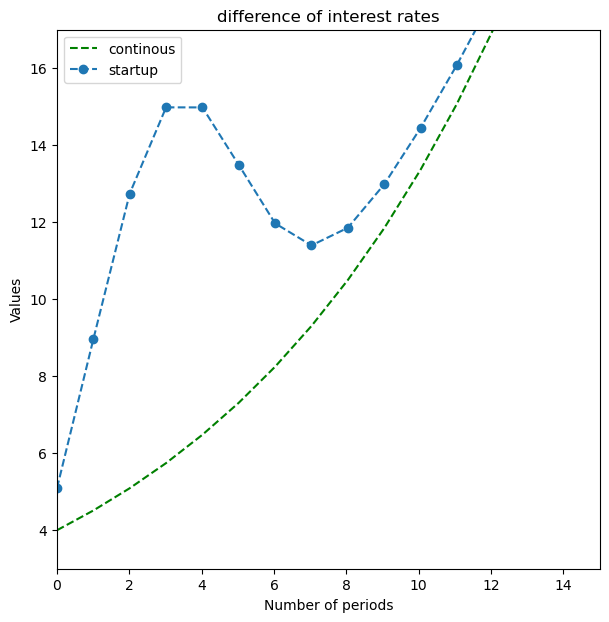

In [85]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn
import math

pv = 4
r = 0.12
n = 200

t0 = 3
t = np.linspace(0, n, n) 

continous = pv * math.e**(r * t)
simple = pv * (1 + r*t)
compound = pv * (1 + r)**t

startup = 0.5 * pv * math.e**(r * t) + 2.5 * pv * math.e**(-r * (t - t0)**2) + 2.1 + 0.8 * (t -t0)

plot.figure(figsize = (7, 7))
plot.title('difference of interest rates')
plot.xlabel('Number of periods')
plot.ylabel('Values')
plot.xlim(0, 15)
plot.ylim(3, 17)
plot.plot(t, continous, 'g--', label = 'continous')
#plot.plot(t, simple, 'b-', label = 'simple Interest')
#plot.plot(t, compound, 'r-', label = 'compound Interest')
plot.plot(t, startup, 'o--', label = 'startup')
plot.legend(fontsize = 10)
plot.show()

In [71]:

def stripchars(inputstr, tobestripped):
    return inputstr.translate(inputstr.maketrans("", "", tobestripped))

print(stripchars("She was a soul stripper. She took my heart!", "aei"))

Sh ws  soul strppr. Sh took my hrt!


In [5]:
# https://www.youtube.com/watch?v=kCc8FmEb1nY

text = "Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book."
chars = sorted(list(set(text)))

stoi = { ch:i for i,ch in enumerate(chars)}
itos = { i:ch for i,ch in enumerate(chars)}

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[e] for e in l])

print(encode('hi there'))
print(decode(encode('hi there')))

# tiktoken for subword encoding



[16, 17, 0, 26, 16, 13, 24, 13]
hi there


In [6]:
import torch
torch.cuda.is_available()

True

In [11]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input_sp0.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s]  # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l])  # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)

print(data.shape, data.dtype)
print(data[:200])

n = int(0.9*len(data))  # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]


torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59])


In [14]:
# we just train the transformer with chunks at a time (blocksize, context length,...)
block_size = 8  # multiple examples packed into this (7 here) as transformer trains on each position
train_data[:block_size+1]  # chunks are used not only for computational efficiency but also to make the transformer see context over various lengths

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [16]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target is {target}")

when input is tensor([18]) the target is 47
when input is tensor([18, 47]) the target is 56
when input is tensor([18, 47, 56]) the target is 57
when input is tensor([18, 47, 56, 57]) the target is 58
when input is tensor([18, 47, 56, 57, 58]) the target is 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target is 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target is 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target is 58
